# Cadenas de decaimiento:

Corresponden a una serie de transformaciones que experimenta un núcleo atómico inestable, a través de una secuencia de desintegraciones.

## Equilibrio radiactivo:

Se sabe que la actividad de una núcleo hijo siempre será cero en el tiempo inicial (*t = 0*), y siempre tenderá a cero conforme el tiempo tienda al infinito. El valor máximo que alcanza la actividad del núcleo hijo se dará justamente en el tiempo en que la actividad del núcleo padre y el núcleo hijo se igualan, lo que se conoce como **equilibrio radiactivo**. \
Existen distintos casos de equilibrio radiactivo dependiendo de la relación que haya entre los tiempos de vida media del núcleo padre y el núcleo hijo. En particular, tenemos los siguientes tres casos:

*   **Equilibrio secular (*Tₚ ≫ Tₕ*)**
*   **Equilibrio transitorio (*Tₚ ≳ Tₕ*)**
*   **No equilibrio (*Tₚ < Tₕ*)**






## Cadena de decaimiento del Uranio-228:

El uranio-228 decae en una serie de núcleos radiactivos hasta llegar al plomo-296, que es un isótopo estable. Más específicamente, la cadena de decaimiento del uranio-228 es la siguiente:

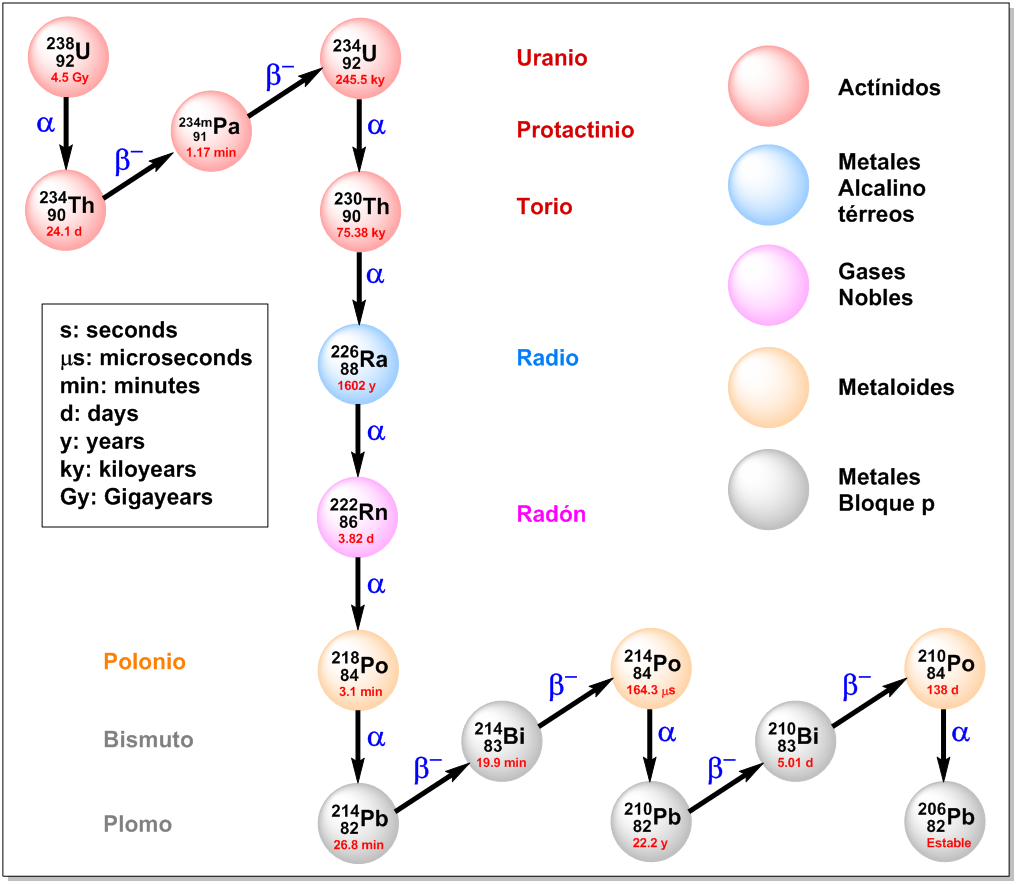


En particular, si nos fijamos en la cadena de desintegración entre el radón-222 hasta el bismuto-214, \
\
 *222-Rn ⟶ 218-Po + α ⟶ 214-Pb + α ⟶ 214-Bi + β-* , \
\
principalmente en sus tiempos de vida media (*T(222Rn) = 3.82 días = 5500.8 min*; *T(218Po) = 3.1 min*; *T(214Pb) = 26.8 min* y *T(214Bi) = 19.9 min*), encontraremos que en esta secuencia de desintegraciones tendremos equilibrio secular entre *222-Rn* y *218-Po*; no equilibrio entre *218-Po* y *214-Pb*; y equilibrio transitorio entre *214-Pb* y *214-Bi*.

## Código:


Cálculo de los coeficientes de decaimiento a partir de las vidas medias mostradas previamente

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vidas medias en la cadena 222-Rn y 214-Bi:
T_Rn = 5500.8
T_Po = 3.1
T_Pb = 26.8
T_Bi = 19.9

# Coeficientes de decaimiento:
lambda_Rn = np.log(2)/T_Rn
lambda_Po = np.log(2)/T_Po
lambda_Pb = np.log(2)/T_Pb
lambda_Bi = np.log(2)/T_Bi

print('COEFICIENTES DE ATENUACIÓN:')
print(f'* 222-Rn: {lambda_Rn:.2e} minˆ(-1)')
print(f'* 218-Po: {lambda_Po:.2e} minˆ(-1)')
print(f'* 214-Pb: {lambda_Pb:.2e} minˆ(-1)')
print(f'* 214-Bi: {lambda_Bi:.2e} minˆ(-1)')
print(f'-'*40)

# Tiempos de máxima actividad - núcleo hijo:
def t_max(lambda_h, lambda_p):
  return np.log(lambda_h/lambda_p)/(lambda_h-lambda_p)
print('TIEMPOS DE MÁXIMA ACTIVIDAD:')
print('Equilibrio secular')
print(f'* Para 218-Po: {t_max(lambda_Po, lambda_Rn):.2f} min')
print('No equilibrio')
print(f'* Para 214-Pb: {t_max(lambda_Pb, lambda_Po):.2f} min')
print('Equilibrio transitorio')
print(f'* Para 214-Bi: {t_max(lambda_Bi, lambda_Pb):.2f} min')

COEFICIENTES DE ATENUACIÓN:
* 222-Rn: 1.26e-04 minˆ(-1)
* 218-Po: 2.24e-01 minˆ(-1)
* 214-Pb: 2.59e-02 minˆ(-1)
* 214-Bi: 3.48e-02 minˆ(-1)
----------------------------------------
TIEMPOS DE MÁXIMA ACTIVIDAD:
Equilibrio secular
* Para 218-Po: 33.48 min
No equilibrio
* Para 214-Pb: 10.91 min
Equilibrio transitorio
* Para 214-Bi: 33.19 min


Gráficas para la actividad y número de núcleos en función del tiempo:

In [3]:
t = np.linspace(0, 100, 100)
def N_p(t, lambda_p):
  return np.exp(-lambda_p*t)
def N_h(t, lambda_p, lambda_h):
  return (lambda_p/(lambda_h - lambda_p))*(np.exp(-lambda_p*t) - np.exp(-lambda_h*t))
def A(N, Lambda):
  return N*Lambda

**Equilibrio secular (222-Rn a 218-Po)**

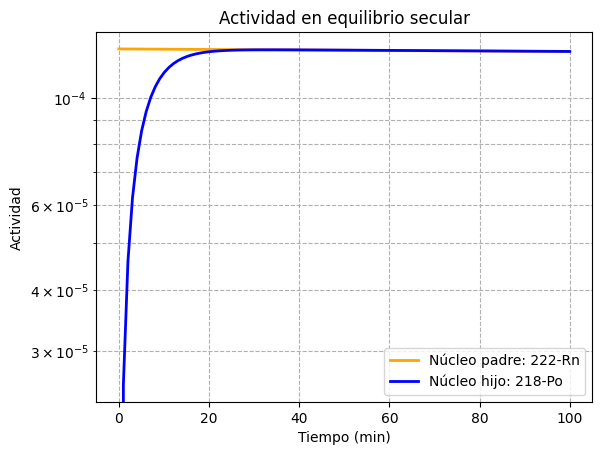

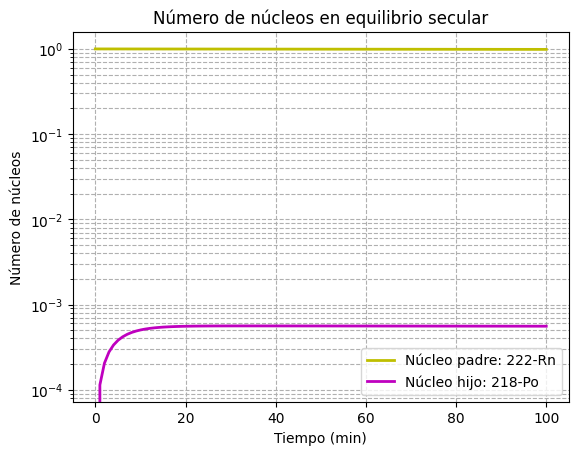

In [44]:
# Número de núcleos:
N_Rn = N_p(t, lambda_Rn)
N_Po = N_h(t, lambda_Rn, lambda_Po)

# Actividad:
A_Rn = A(N_Rn, lambda_Rn)
A_Po = A(N_Po, lambda_Po)

# Gráficas:
plt.semilogy(t, A_Rn, color= 'orange', linewidth=2, label='Núcleo padre: 222-Rn')
plt.semilogy(t, A_Po, color= 'blue', linewidth=2, label='Núcleo hijo: 218-Po')
plt.title('Actividad en equilibrio secular')
plt.xlabel('Tiempo (min)')
plt.ylabel('Actividad')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Actividad_Equilibrio_Secular.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.semilogy(t, N_Rn, color= 'y', linewidth=2, label='Núcleo padre: 222-Rn')
plt.semilogy(t, N_Po, color='m', linewidth=2, label='Núcleo hijo: 218-Po')
plt.title('Número de núcleos en equilibrio secular')
plt.xlabel('Tiempo (min)')
plt.ylabel('Número de núcleos')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Núcleos_Equilibrio_Secular.jpg', dpi=300, bbox_inches='tight')
plt.show()

**Equilibrio transitorio (214-Pb a 214-Bi)**

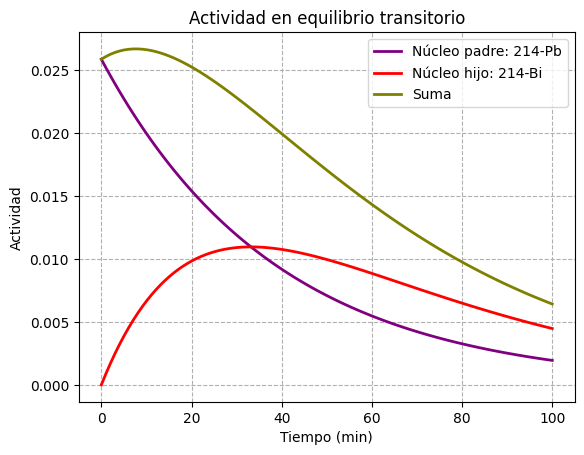

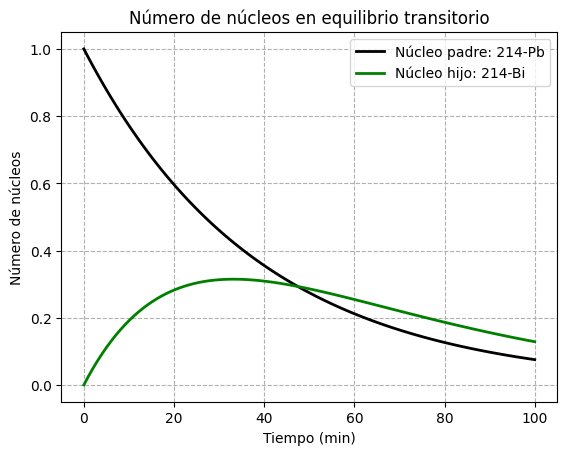

In [45]:
# Número de núcleos:
N_Pb = N_p(t, lambda_Pb)
N_Bi = N_h(t, lambda_Pb, lambda_Bi)

# Actividad:
A_Pb = A(N_Pb, lambda_Pb)
A_Bi = A(N_Bi, lambda_Bi)
A_sum = A_Pb + A_Bi

# Gráficas:
plt.plot(t, A_Pb, color= 'purple', linewidth=2, label='Núcleo padre: 214-Pb')
plt.plot(t, A_Bi, color= 'red', linewidth=2, label='Núcleo hijo: 214-Bi')
plt.plot(t, A_sum, color= 'olive', linewidth=2, label='Suma')
plt.title('Actividad en equilibrio transitorio')
plt.xlabel('Tiempo (min)')
plt.ylabel('Actividad')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Actividad_Equilibrio_Transitorio.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.plot(t, N_Pb, color= 'black', linewidth=2, label='Núcleo padre: 214-Pb')
plt.plot(t, N_Bi, color='green', linewidth=2, label='Núcleo hijo: 214-Bi')
plt.title('Número de núcleos en equilibrio transitorio')
plt.xlabel('Tiempo (min)')
plt.ylabel('Número de núcleos')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Núcleos_Equilibrio_Transitorio.jpg', dpi=300, bbox_inches='tight')
plt.show()

**No equilibrio (218-Po a 214-Pb)**

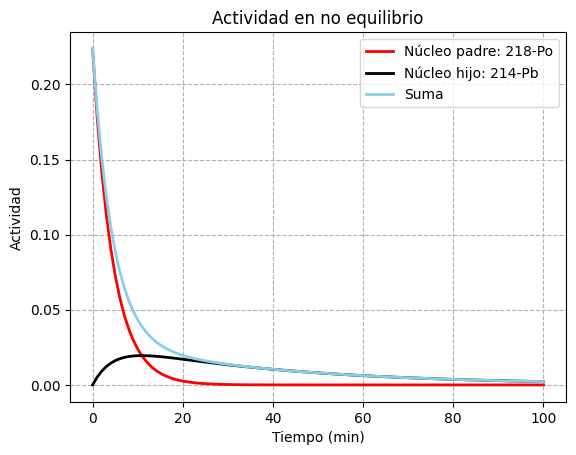

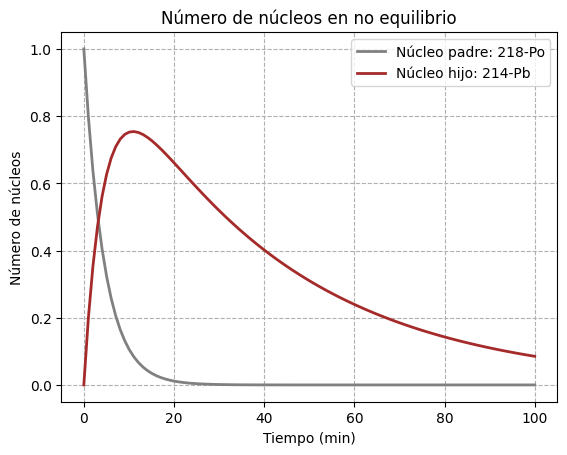

In [46]:
# Número de núcleos:
N_Po_NE = N_p(t, lambda_Po)
N_Pb_NE = N_h(t, lambda_Po, lambda_Pb)

# Actividad:
A_Po_NE = A(N_Po_NE, lambda_Po)
A_Pb_NE = A(N_Pb_NE, lambda_Pb)
A_sum_NE = A_Po_NE + A_Pb_NE

# Gráficas:
plt.plot(t, A_Po_NE, color= 'red', linewidth=2, label='Núcleo padre: 218-Po')
plt.plot(t, A_Pb_NE, color= 'black', linewidth=2, label='Núcleo hijo: 214-Pb')
plt.plot(t, A_sum_NE, color= 'skyblue', linewidth=2, label='Suma')
plt.title('Actividad en no equilibrio')
plt.xlabel('Tiempo (min)')
plt.ylabel('Actividad')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Actividad_No_Equilibrio.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.plot(t, N_Po_NE, color= 'gray', linewidth=2, label='Núcleo padre: 218-Po')
plt.plot(t, N_Pb_NE, color='brown', linewidth=2, label='Núcleo hijo: 214-Pb')
plt.title('Número de núcleos en no equilibrio')
plt.xlabel('Tiempo (min)')
plt.ylabel('Número de núcleos')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Núcleos_No_Equilibrio.jpg', dpi=300, bbox_inches='tight')
plt.show()